


1/1 [==============================] - 1s 620ms/step


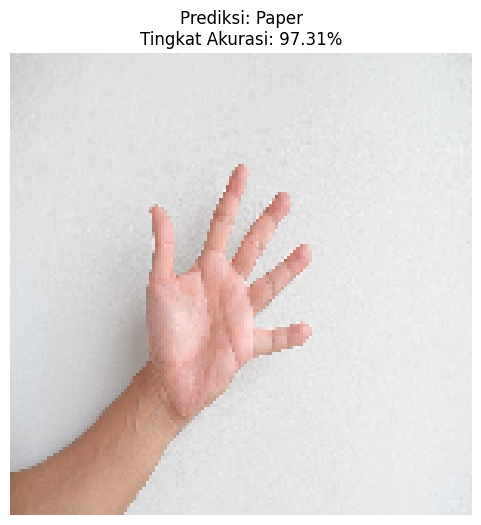

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Load Model
saved_model = load_model('rock_paper_scissors_model.h5')


# Class Definition

class_names = ['paper', 'rock', 'scissors']


# Model definition
def predict_new_image(image_path):

    try:
        # Muat gambar dari path dengan ukuran target yang sama seperti saat training
        img = image.load_img(image_path, target_size=(150, 150))

        # Ubah gambar menjadi array numpy
        img_array = image.img_to_array(img)

        # Tambahkan dimensi batch
        img_array = np.expand_dims(img_array, axis=0)

        # Lakukan normalisasi piksel (rescale), sama seperti saat training
        img_array /= 255.0

        # Prediksi kelas gambar menggunakan model yang telah disimpan
        prediction = saved_model.predict(img_array)

        # Menghitung indeks kelas dengan probabilitas tertinggi
        predicted_index = np.argmax(prediction[0])
        predicted_class = class_names[predicted_index]
        confidence = np.max(prediction[0]) * 100

        # Tampilkan gambar dan hasil prediksi
        plt.figure(figsize=(6,6))
        plt.imshow(img)
        plt.title(f"Prediksi: {predicted_class.capitalize()}\nTingkat Akurasi: {confidence:.2f}%")
        plt.axis('off')
        plt.show()

    except FileNotFoundError:
        print(f"ERROR: File tidak ditemukan di path: {image_path}")
    except Exception as e:
        print(f"Terjadi eror saat melakukan prediksi: {e}")


# Uji Coba Prediksi


path_gambar_baru = 'fotokertas1.jpg' 

# Periksa apakah file gambar baru ada
if os.path.exists(path_gambar_baru):
    predict_new_image(path_gambar_baru)
else:
    print(f"File '{path_gambar_baru}' tidak ditemukan. Silakan unggah file terlebih dahulu.")
